In [10]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
import scipy.spatial.transform as sptf
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 14,
})

from pylgmath import se3op

import utils

def load_pred_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)

def load_gt_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)


def plot_pred_poses(ax, filename, gt_poses, label):
    pred_poses = load_pred_poses(filename)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label)


gt_path = '/media/yuchen/T7/ASRL/data/kitti_360'
pred_path = '/home/yuchen/ASRL/temp/doppler_odometry/kitti_360'
sequences = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

In [11]:
### compute kitti metric
sequence = sequences[7]

gt_poses = load_gt_poses(osp.join(gt_path, sequence, sequence+'.txt'))

pred_file = 'elastic'
pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
assert len(gt_poses) == len(pred_poses)
t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry(gt_poses, pred_poses)
print(f"{pred_file} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f} \\\\")

pred_file = 'steam_0807_1'
pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
assert len(gt_poses) == len(pred_poses)
t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry(gt_poses, pred_poses)
print(f"{pred_file} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f} \\\\")

elastic & 0.38 & 0.0008 & 0.48 & 0.0014 \\
steam_0807_1 & 0.51 & 0.0012 & 0.59 & 0.0016 \\


(3160,) mean:  0.011651257354213044 abs mean:  0.011651257354213044
(3160,) mean:  0.006933921146208166 abs mean:  0.006933921146208166


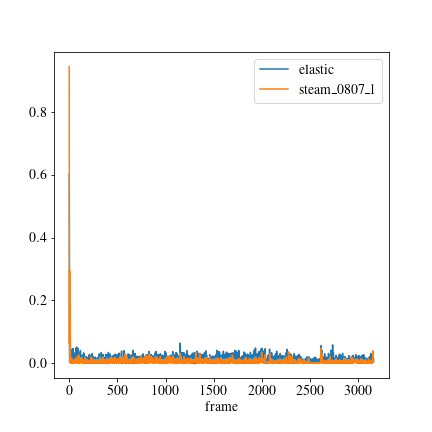

In [12]:
### plot local error
sequence = sequences[7]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

error_file = 'elastic'
error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
print(error.shape, "mean: ", np.mean(error, axis=0), "abs mean: ", np.mean(np.abs(error), axis=0))
if len(error.shape) == 1: error = error[..., None]
ax.plot(error[:, 0], label=error_file)

error_file = 'steam_0807_1'
error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
print(error.shape, "mean: ", np.mean(error, axis=0), "abs mean: ", np.mean(np.abs(error), axis=0))
if len(error.shape) == 1: error = error[..., None]
ax.plot(error, label=error_file)

ax.set_xlabel('frame')
ax.legend()

plt.show()

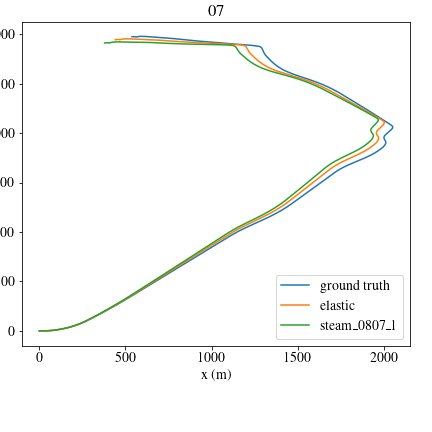

In [13]:
### plot path in 2d
sequence = sequences[7]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95, wspace=0.3, hspace=0.3)

gt_poses = load_gt_poses(osp.join(gt_path, sequence, sequence+'.txt'))
ax.plot(gt_poses[:, 0, 3], gt_poses[:, 1, 3], label='ground truth')

pred_file = 'elastic'
plot_pred_poses(ax, osp.join(pred_path, pred_file, sequence+'_poses.txt'), gt_poses, pred_file)

pred_file = 'steam_0807_1'
plot_pred_poses(ax, osp.join(pred_path, pred_file, sequence+'_poses.txt'), gt_poses, pred_file)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title(sequence)
ax.legend()

plt.show()